Assignment 1---- 190531L----Rukmal.M.A.D

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Question 1

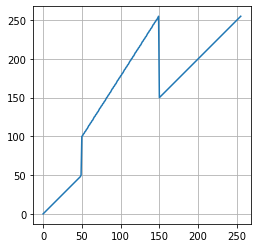

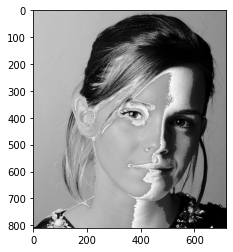

In [10]:
img = cv.imread(r'D:\Image processing module\Assignment 1\emma_gray.jpg',cv.IMREAD_COLOR)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)
t = np.concatenate((t1,t2,t3),axis= 0).astype(np.uint8)
fig,ax = plt.subplots()
ax.grid()
plt.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
t_img = cv.LUT(img,t)
fig,ax = plt.subplots()
ax.imshow(t_img)
plt.show()

Question 2(a)

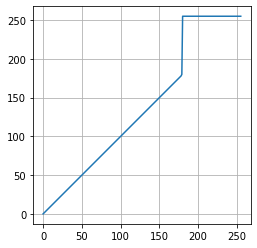

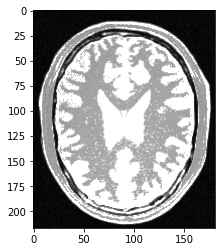

In [40]:
img = cv.imread(r'D:\Image processing module\Assignment 1\brain_proton_density_slice.png',cv.IMREAD_COLOR)
assert img is not None

t1 = np.linspace(0,180,180)
t2 = np.linspace(255,255,76)
#t3 = np.linspace(255,255,106)
t = np.concatenate((t1,t2),axis= 0).astype(np.uint8)
fig,ax = plt.subplots()
ax.grid()
plt.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
t_img = cv.LUT(img,t)
fig,ax = plt.subplots()
ax.imshow(t_img)
plt.show()

Question 2(b)

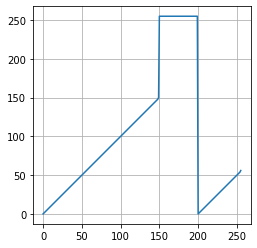

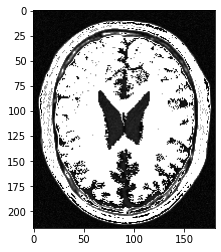

In [53]:
img = cv.imread(r'D:\Image processing module\Assignment 1\brain_proton_density_slice.png',cv.IMREAD_COLOR)
assert img is not None

t1 = np.linspace(0,150,150)
t2 = np.linspace(255,255,50)
t3 = np.linspace(0,56,56)
t = np.concatenate((t1,t2,t3),axis= 0).astype(np.uint8)
fig,ax = plt.subplots()
ax.grid()
plt.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
t_img = cv.LUT(img,t)
fig,ax = plt.subplots()
ax.imshow(t_img)
plt.show()

Question 3

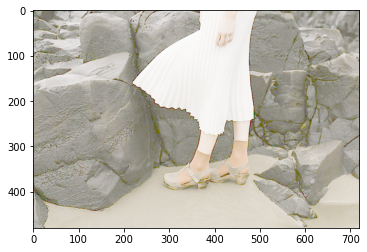

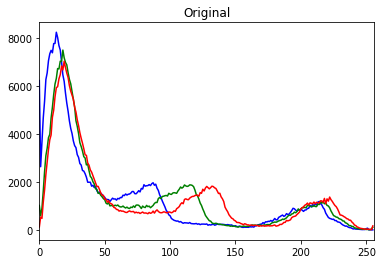

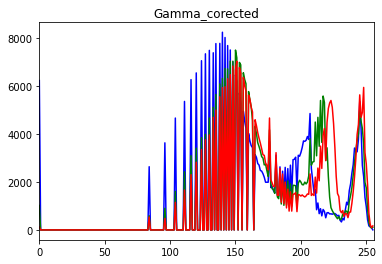

In [31]:
img = cv.imread(r'D:\Image processing module\Assignment 1\highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert img is not None
gamma =0.2

transform = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
t_img = cv.LUT(img,transform)
img_plt = cv.cvtColor(t_img,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(img_plt)
plt.show()
#Original
color=('b','g','r')
for i,c in enumerate(color):
    hist=cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.xlim([0,256])
    plt.title("Original")
plt.show()

#Gamma corrected
for i,c in enumerate(color):
    hist=cv.calcHist([t_img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.xlim([0,256])
    plt.title("Gamma_corected")
plt.show()


Question 4

In [61]:
def equalHist(img):# function for equalization
    # convert img into numpy array
    image_array = np.asarray(img)
    histogram_array = np.bincount(image_array.flatten(),minlength =256)
    #normalize the histogram
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array/num_pixels
    # normalized cumulated histogrm
    c_histogram_array = np.cumsum(histogram_array)
    # pixel mapping table
    transform_map = np.floor(255*c_histogram_array).astype(np.uint8)
    
    img_list = list(image_array.flatten())
    #Applying transformation
    eq_img_list = [transform_map[p] for p in img_list]
    eq_img_array = np.reshape(np.asarray(eq_img_list),image_array.shape)
    return eq_img_array 

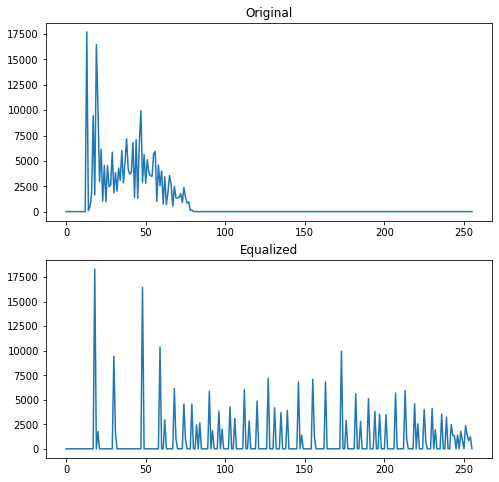

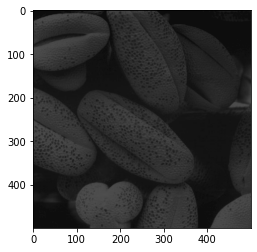

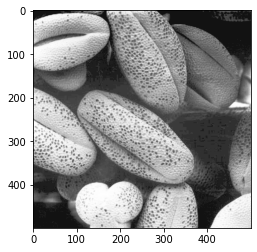

In [62]:
img = cv.imread(r'D:\Image processing module\Assignment 1\shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None
hist_img = cv.calcHist([img],[0],None,[256],[0,256])
E_img = equalHist(img)
E_hist_img = cv.calcHist([E_img],[0],None,[256],[0,256])
fig,ax = plt.subplots(2,1,figsize=(8,8))
ax[0].title.set_text("Original")
ax[1].title.set_text("Equalized")
ax[0].plot(hist_img)
ax[1].plot(E_hist_img)
img_o = cv.cvtColor(img,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(img_o)
plt.show()
E_img_plt = cv.cvtColor(E_img,cv.COLOR_BGR2RGB)
fig,ax = plt.subplots()
ax.imshow(E_img_plt)
plt.show()

Question 5